## 랜덤포레스트

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics
from sklearn.grid_search import GridSearchCV

import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'sklearn.grid_search'

## 결정트리

In [ ]:
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
print(clf.score(X_test, y_test))

In [ ]:
# 결정 트리를 사용한 경우의 중요 변수

list(zip(cancer.feature_names, clf.feature_importances_.round(4)))[:10]

In [ ]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })
df=df.sort_values('importance', ascending=False)
print(df.head(10))

In [ ]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

In [ ]:
# 랜덤 포레스트를 사용한 경우의 중요 특성

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

df = pd.DataFrame({'feature':cancer.feature_names,'importance':rfc.feature_importances_ })
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

## 그리드 서치
### SMV과 비교

In [ ]:
#그리드 서치의 매개변수를 설정한다(C, gamma)
params = [{"C": [1,10,100,1000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]

#그리드 서치 실행
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1 )
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

#테스트 데이터로 최종 평가
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

# ------연습장---------

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics
#from sklearn.grid_search import GridSearchCV

import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()  #유방암 data를 cancer에 load하다
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(   #train, test로 나누고
    cancer.data, cancer.target, stratify=cancer.target)   # cancer.data:입력 데이터로 넣다  #cancer.target:target 데이터로 넣다
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
print(clf.score(X_test, y_test))  #결정 트리를 쓰고 있다

0.916083916083916


In [29]:
#결정 트리를 사용한 경우의 중요 변수
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))[:10]  #feature이름과 feature 중요도 소수점 4째 자리까지

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0)]

In [30]:
df = pd.DataFrame({'feature':cancer.feature_names, 'importance':clf.feature_importances_ })
df=df.sort_values('importance', ascending=False)
print(df.head(10))
#숫자가 큰 순으로 sorting하다 내림차순으로 하다

                 feature  importance
22       worst perimeter    0.694689
27  worst concave points    0.121068
7    mean concave points    0.042647
1           mean texture    0.041720
21         worst texture    0.039639
13            area error    0.017216
20          worst radius    0.017188
15     compactness error    0.012042
8          mean symmetry    0.011405
14      smoothness error    0.002385


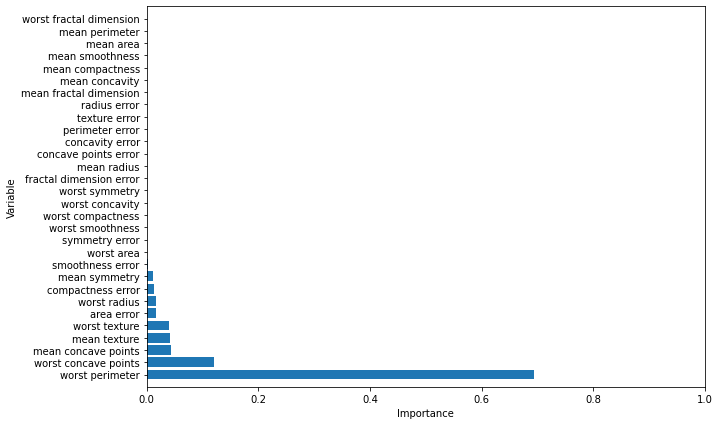

In [31]:
x = df.feature
y = df.importance
ypos=np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x,y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.ylim(-1, len(x))
plt.show()


#어떤 특성 변수가 결정변수에서 얼마나 큰 역할인지 알 수 있다.

0.951048951048951


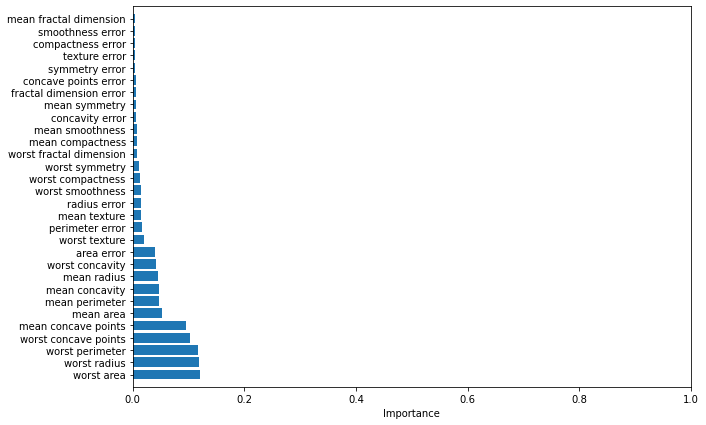

In [32]:
# 랜덤 포레스트를 사용한 경우의 중요 특성

rfc = RandomForestClassifier(n_estimators=300)  #300개의 갼단하 모델을 만들어, 이들의 평균을 취해라
rfc.fit(X_train, y_train)  #모델을 학습시키고
print(rfc.score(X_test, y_test))  #점수를 내보다

df = pd.DataFrame({'feature' : cancer.feature_names, 'importance':rfc.feature_importances_})  #어떤 feature가 중요한 역할을 했는지 확인하고
df = df.sort_values('importance', ascending=False)
x = df.feature  #x와 y를 feature와 importance로 두고
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))  #그래프까지 그리다
plt.barh(x,y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.xlim(0,1)
plt.ylim(-1, len(x))
plt.show()


#0.95로 아까 결정트리 0.91보다 성능이 훨씬 좋아졌다
#여러개의 데이터를 골고루 중요하게 여기다.
#저번에 결정트리에서는 몇개 데이터만 중요하게 인식해서 사용했다.

In [33]:
# 랜덤포레스트는 하나하나 결정트리를 이용하되,
# 그 결정트리들을 간단하게 만들다. 사용하는 특성, 샘플수를 줄이다
#그런  결정트리를 많이 만들다

NameError: name 'GridSearchCV' is not defined

In [3]:
#그리드 서치의 매개변수를 설정한다.(C, gamma)
params = [{"C" : [1, 10, 100, 1000], "kernel": ["linear"]},  #-> 4가지
         {"C": [1, 10, 100, 1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]  #-> 8가지
#매개변수를 C, gamma에 써주어야 하는데, 최적의 값이 얼마인지 잘모른다.
#예를 들어 kernel을 linear 모델로 하고,  등등 여러가지 선택의 경우의 수가 있는데
#컴퓨터에게 모든 경우의 수를 한번씩 해보고, 제일 좋은 것을 찾아보아라 -> 이렇게 해주는 함수가 있다.

#그리드 서치 실행
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)  # GridSearchCV: 모든 경우의 수를 다 따져보아라
#(svm.SVC(): 사용할 알고리즘을 써준다, params, n_jobs=-1: 몇개의 CPU나 프로세서를 사용할 것인가 이다. -> -1은 주어진 하드웨어를 다 사용하라는 뜻이다 
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)  #.best_estimator: 여러 조건 중에서 가장 스코어가 높게 나온것
print('최적 score :',clf.best_score_) #총 12가지 경우를 다 돌린 다음에 출력해주다

#테스트 데이터로 최종 평가
score = clf.score(X_test, y_test)  #평가해주다
print('최종평가 =', score)

NameError: name 'GridSearchCV' is not defined